In [3]:
import pandas as pd
import numpy as np

In [6]:
books = pd.read_csv(r'C:\Users\dream\OneDrive\Desktop\BOOK RECOMMENDER SYSTEM\DATA\Books.csv')
users = pd.read_csv(r'C:\Users\dream\OneDrive\Desktop\BOOK RECOMMENDER SYSTEM\DATA\Users.csv')
ratings = pd.read_csv(r'C:\Users\dream\OneDrive\Desktop\BOOK RECOMMENDER SYSTEM\DATA\Ratings.csv')


C:\Users\dream\AppData\Local\Temp\ipykernel_33224\3318632178.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r'C:\Users\dream\OneDrive\Desktop\BOOK RECOMMENDER SYSTEM\DATA\Books.csv')


# **EDA**

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

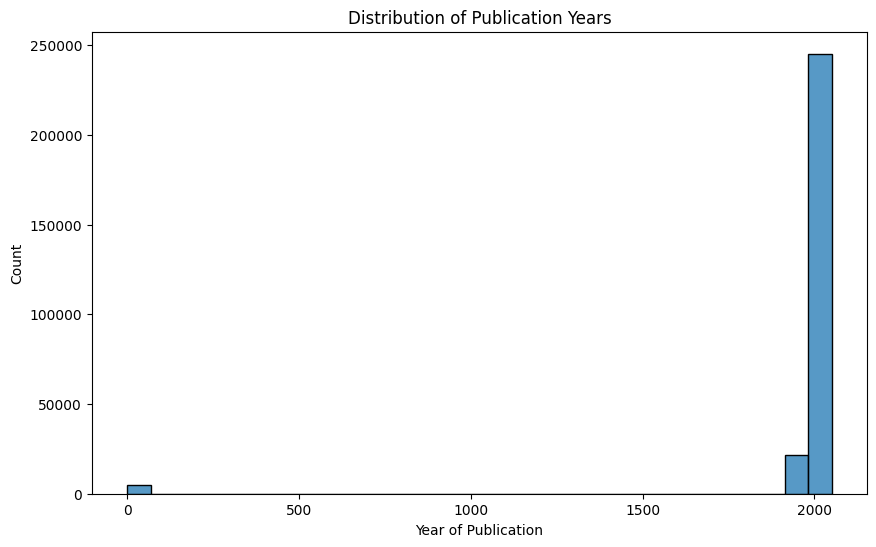

In [17]:
# Distribution of Publication Years
plt.figure(figsize=(10, 6))
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
sns.histplot(books['Year-Of-Publication'].dropna(), bins=30, kde=False)
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.show()

In [18]:
top_authors = books['Book-Author'].value_counts().head(10)
top_publishers = books['Publisher'].value_counts().head(10)

C:\Users\dream\AppData\Local\Temp\ipykernel_33224\3020759989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_authors.index, x=top_authors.values, palette='viridis')


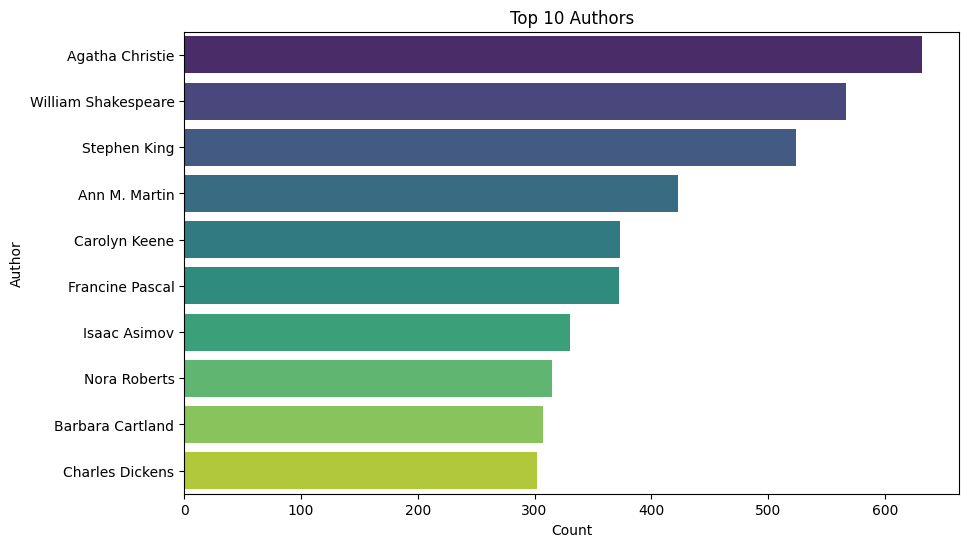

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values, palette='viridis')
plt.title('Top 10 Authors')
plt.xlabel('Count')
plt.ylabel('Author')
plt.show()

C:\Users\dream\AppData\Local\Temp\ipykernel_33224\2457568266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='viridis')


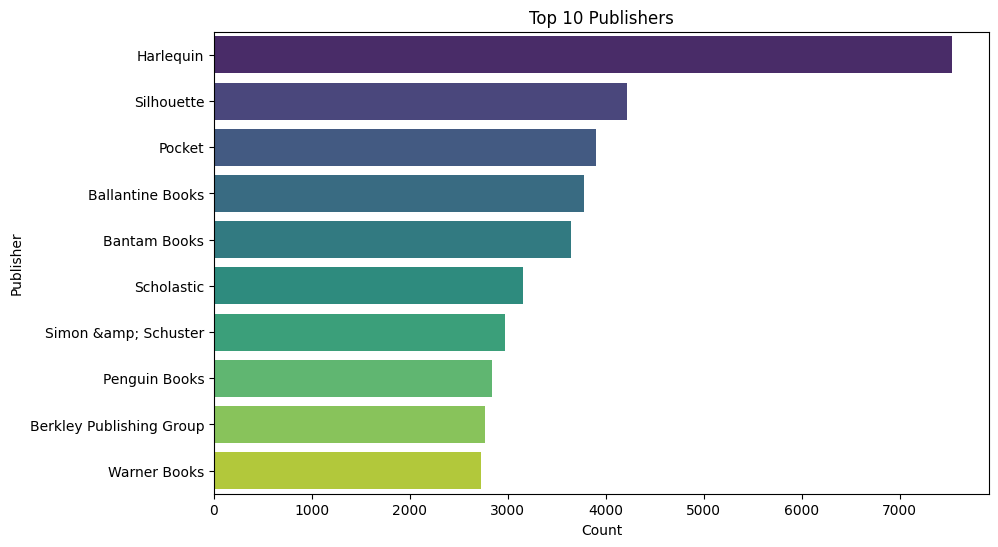

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.show()

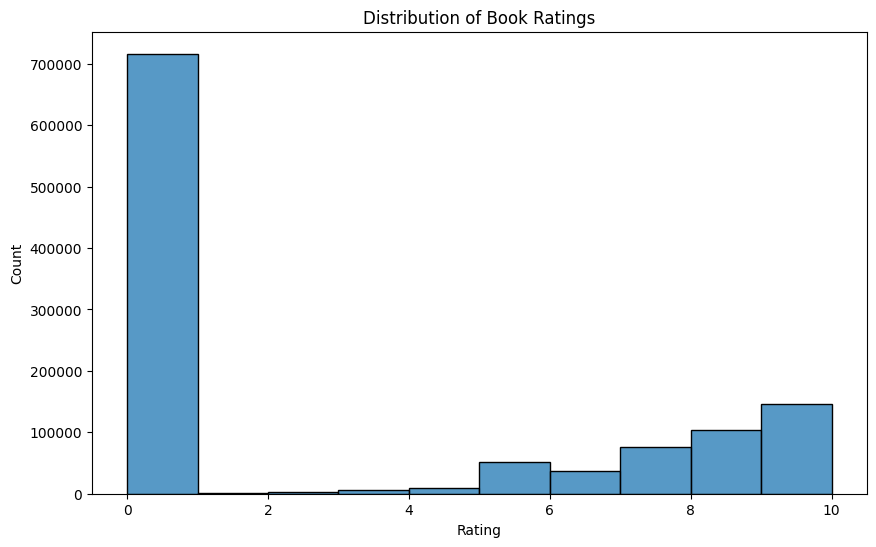

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Book-Rating'], bins=10, kde=False)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [22]:
top_rated_books = ratings['ISBN'].value_counts().head(10)

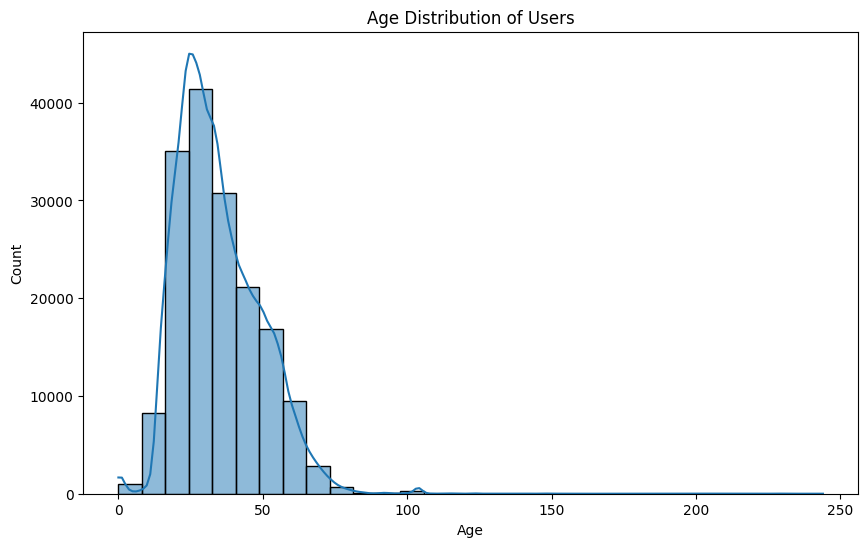

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [24]:
top_locations = users['Location'].value_counts().head(10)

C:\Users\dream\AppData\Local\Temp\ipykernel_33224\4010703049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')


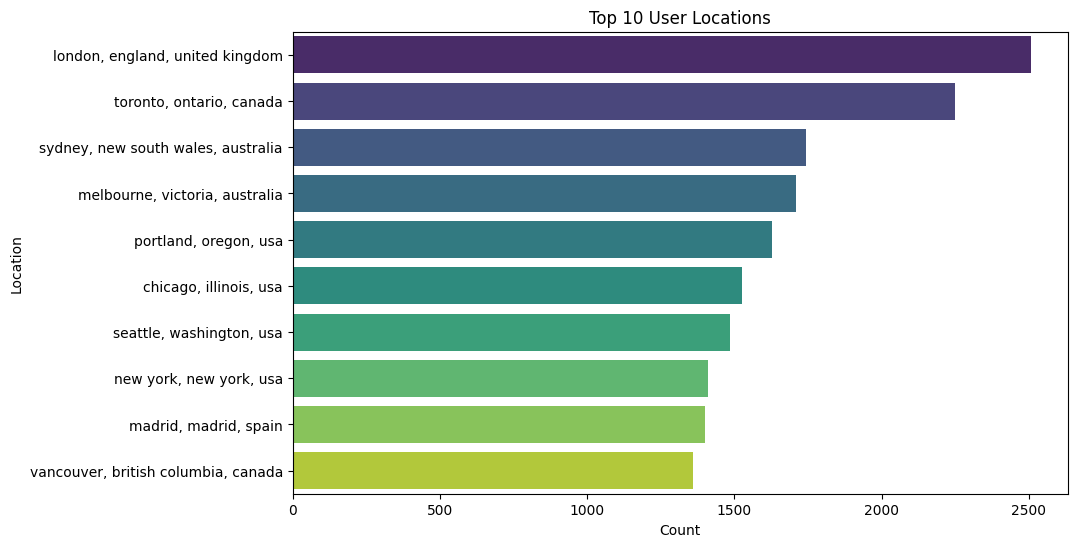

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
plt.title('Top 10 User Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

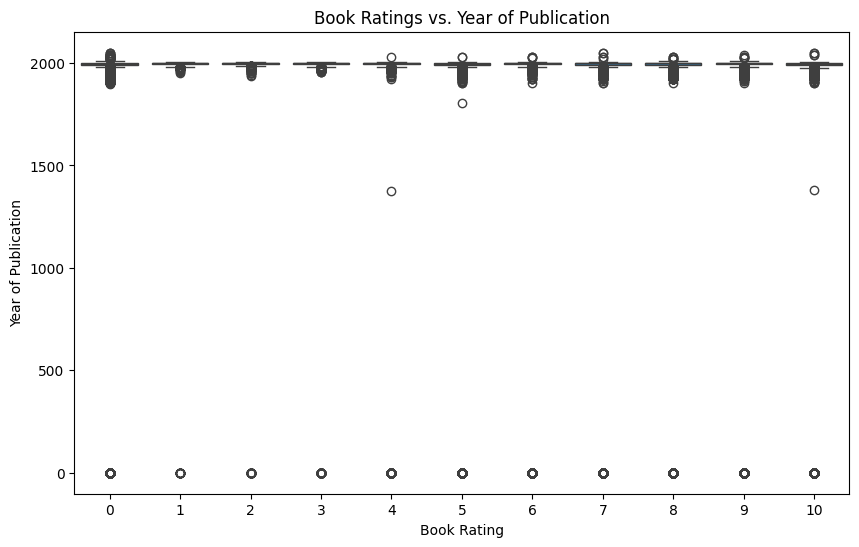

In [26]:
plt.figure(figsize=(10, 6))
merged = pd.merge(ratings, books, on='ISBN')
sns.boxplot(x='Book-Rating', y='Year-Of-Publication', data=merged)
plt.title('Book Ratings vs. Year of Publication')
plt.xlabel('Book Rating')
plt.ylabel('Year of Publication')
plt.show()

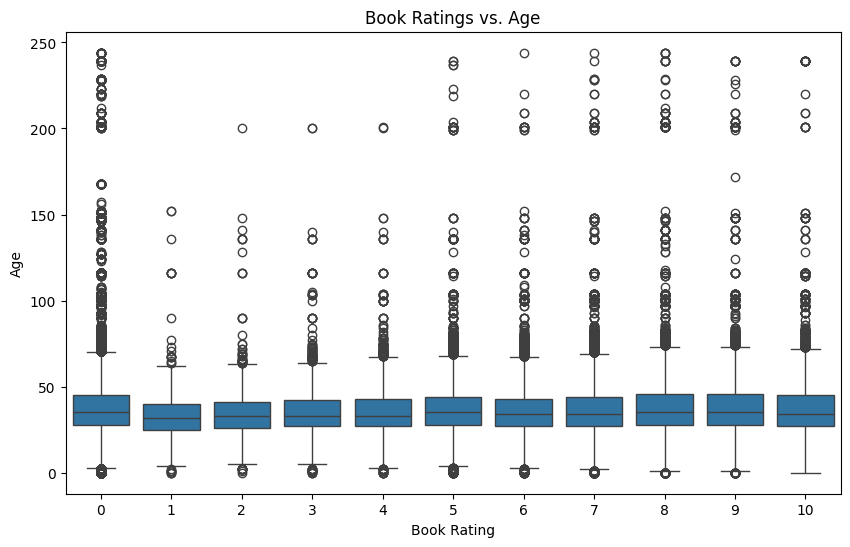

In [27]:
plt.figure(figsize=(10, 6))
merged = pd.merge(ratings, users, on='User-ID')
sns.boxplot(x='Book-Rating', y='Age', data=merged)
plt.title('Book Ratings vs. Age')
plt.xlabel('Book Rating')
plt.ylabel('Age')
plt.show()

# **POPULARITY BASED RECOMMANDER SYSTEM**

In [28]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [29]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [30]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [31]:
# Step 1: Convert 'Book-Rating' to numeric
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Step 2: Drop rows with NaN values in 'Book-Rating'
ratings_with_name.dropna(subset=['Book-Rating'], inplace=True)

# Step 3: Group by 'Book-Title' and calculate the mean of 'Book-Rating'
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Step 4: Rename the column to 'avg_rating'
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Display the result
print(avg_rating_df)


                                               Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241066                                      Ã?Â?lpiraten.    0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241068                                Ã?Â?sterlich leben.    7.000000
241069                              Ã?Â?stlich der Berge.    2.666667
241070                                  Ã?Â?thique en toc    4.000000

[241071 rows x 2 columns]


In [32]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [33]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [34]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [35]:
popular_df['Image-URL-M'][0]


'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# **Collaborative Filtering Based**

In [36]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
edu_users = x[x].index

In [37]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(edu_users)]

In [38]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [39]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [40]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [41]:
pt.fillna(0,inplace=True)

In [42]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 1984 to \O\" Is for Outlaw"
Columns: 810 entries, 254 to 278418
dtypes: float64(810)
memory usage: 4.4+ MB


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
#using cosine similarity
similarity_scores = cosine_similarity(pt)

In [45]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [46]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))


In [47]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [48]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

# OTHER THEN COSINE OPTIONS

In [64]:
from sklearn.neighbors import NearestNeighbors

# Initialize the KNN model with Euclidean distance
knn = NearestNeighbors(metric='euclidean', algorithm='brute')
knn.fit(pt)
distances, indices = knn.kneighbors(pt, n_neighbors=5)


In [65]:
from sklearn.neighbors import NearestNeighbors

# Initialize the KNN model with Manhattan distance
knn = NearestNeighbors(metric='manhattan', algorithm='brute')
knn.fit(pt)
distances, indices = knn.kneighbors(pt, n_neighbors=5)


In [66]:
import numpy as np

def pearson_similarity(matrix):
    return np.corrcoef(matrix)

# Compute Pearson correlation similarity matrix
pearson_sim = pearson_similarity(pt)

# Use NearestNeighbors with precomputed distances
knn = NearestNeighbors(metric='precomputed')
knn.fit(1 - pearson_sim)  # Convert similarity to distance
distances, indices = knn.kneighbors(1 - pearson_sim, n_neighbors=5)


In [67]:
from sklearn.neighbors import NearestNeighbors

# Initialize the KNN model with Jaccard similarity
knn = NearestNeighbors(metric='jaccard', algorithm='brute')
knn.fit(pt)
distances, indices = knn.kneighbors(pt, n_neighbors=5)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [68]:
from sklearn.neighbors import NearestNeighbors

# Initialize the KNN model with Hamming distance
knn = NearestNeighbors(metric='hamming', algorithm='brute')
knn.fit(pt)
distances, indices = knn.kneighbors(pt, n_neighbors=5)


In [69]:
for i, book in enumerate(pt.index):
    print(f"Book: {book}")
    print("Nearest Neighbors:")
    for idx in indices[i]:
        print(pt.index[idx])
    print("\n")

Streaming output truncated to the last 5000 lines.
Jacob Have I Loved
No Safe Place
Exclusive


Book: Dolores Claiborne
Nearest Neighbors:
Dolores Claiborne
Winter Moon
No Safe Place
Jacob Have I Loved
Exclusive


Book: Don't Stand Too Close to a Naked Man
Nearest Neighbors:
Don't Stand Too Close to a Naked Man
Exclusive
Jacob Have I Loved
No Safe Place
Colony


Book: Don't Sweat the Small Stuff and It's All Small Stuff : Simple Ways to Keep the Little Things from Taking Over Your Life (Don't Sweat the Small Stuff Series)
Nearest Neighbors:
Don't Sweat the Small Stuff and It's All Small Stuff : Simple Ways to Keep the Little Things from Taking Over Your Life (Don't Sweat the Small Stuff Series)
No Safe Place
Exclusive
A Civil Action
Jacob Have I Loved


Book: Dr. Atkins' New Diet Revolution
Nearest Neighbors:
Dr. Atkins' New Diet Revolution
Deck the Halls (Holiday Classics)
Exclusive
No Safe Place
Long After Midnight


Book: Dragon Tears
Nearest Neighbors:
Dragon Tears
Winter Moon
No S